In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_cholesterol = pd.read_csv("./datasets/cholesterol.csv")

In [3]:
df_cholesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     996 non-null    object 
 2   Fumante             997 non-null    object 
 3   Nível de Atividade  996 non-null    object 
 4   Idade               997 non-null    float64
 5   Peso                997 non-null    float64
 6   Altura              997 non-null    float64
 7   Colesterol          1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [4]:
# Drop "Id" column
df_cholesterol.drop(columns=["Id"], axis=1, inplace=True)

In [5]:
# Rename column names
df_cholesterol.columns = [
    "blood_type",
    "smoker",
    "activity_level",
    "age",
    "weight",
    "height",
    "cholesterol",
]

In [6]:
df_cholesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   blood_type      996 non-null    object 
 1   smoker          997 non-null    object 
 2   activity_level  996 non-null    object 
 3   age             997 non-null    float64
 4   weight          997 non-null    float64
 5   height          997 non-null    float64
 6   cholesterol     1000 non-null   float64
dtypes: float64(4), object(3)
memory usage: 54.8+ KB


In [7]:
# Copy the dataframe for EDA and bucketing
df_cholesterol_eda = df_cholesterol.copy()
df_cholesterol_bucketing = df_cholesterol.copy()

## EDA


In [8]:
df_cholesterol_eda.head(10)

,blood_type,smoker,activity_level,age,weight,height,cholesterol
0,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,A,Não,Moderado,68.0,105.0,184.0,236.98
2,O,Não,Alto,25.0,64.8,180.0,161.79
3,A,Não,Alto,43.0,120.2,167.0,336.24
4,AB,Não,Baixo,79.0,88.5,175.0,226.23
5,B,Não,Baixo,68.0,66.8,170.0,185.31
6,A,Sim,Baixo,60.0,117.3,181.0,289.33
7,O,Sim,Moderado,35.0,86.9,174.0,216.48
8,O,Não,Baixo,62.0,81.3,166.0,235.30
9,B,Sim,Alto,44.0,32.7,165.0,97.79


In [9]:
df_cholesterol_eda.blood_type.unique()

array(['B', 'A', 'O', 'AB', nan], dtype=object)

In [10]:
df_cholesterol_eda.smoker.unique()

array(['Sim', 'Não', nan], dtype=object)

In [11]:
df_cholesterol_eda.activity_level.unique()

array(['Baixo', 'Moderado', 'Alto', nan], dtype=object)

In [12]:
# Count missing values
df_cholesterol_eda.isna().sum()

blood_type        4
smoker            3
activity_level    4
age               3
weight            3
height            3
cholesterol       0
dtype: int64

In [13]:
df_cholesterol_eda.describe()

,age,weight,height,cholesterol
count,997.000000,997.000000,997.000000,1000.000000
mean,49.206620,76.496690,174.889669,199.453260
std,17.476704,21.439132,8.844703,50.625152
min,20.000000,15.400000,160.000000,36.260000
25%,34.000000,61.700000,167.000000,166.345000
50%,49.000000,75.500000,175.000000,199.455000
75%,65.000000,90.200000,183.000000,233.785000
max,79.000000,158.100000,190.000000,372.670000


In [14]:
# Collect modes from categorical columns
blood_type_mode = df_cholesterol_eda.blood_type.mode()
smoker_mode = df_cholesterol_eda.smoker.mode()
activity_level_mode = df_cholesterol_eda.activity_level.mode()

blood_type_mode, smoker_mode, activity_level_mode

(0    O
 Name: blood_type, dtype: object,
 0    Não
 Name: smoker, dtype: object,
 0    Baixo
 Name: activity_level, dtype: object)

In [15]:
# Collect medians from numerical columns
age_median = df_cholesterol_eda.age.median()
weight_median = df_cholesterol_eda.weight.median()
height_median = df_cholesterol_eda.height.median()

age_median, weight_median, height_median

(np.float64(49.0), np.float64(75.5), np.float64(175.0))

In [16]:
# Fill missing values
df_cholesterol_eda.fillna(
    {
        "blood_type": blood_type_mode[0],
        "smoker": smoker_mode[0],
        "activity_level": activity_level_mode[0],
        "age": age_median,
        "weight": weight_median,
        "height": height_median,
    },
    inplace=True,
)

In [17]:
df_cholesterol_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   blood_type      1000 non-null   object 
 1   smoker          1000 non-null   object 
 2   activity_level  1000 non-null   object 
 3   age             1000 non-null   float64
 4   weight          1000 non-null   float64
 5   height          1000 non-null   float64
 6   cholesterol     1000 non-null   float64
dtypes: float64(4), object(3)
memory usage: 54.8+ KB


In [18]:
# Convert age and height to integers
df_cholesterol_eda.age = df_cholesterol_eda.age.astype(int)
df_cholesterol_eda.height = df_cholesterol_eda.height.astype(int)

In [19]:
df_cholesterol_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   blood_type      1000 non-null   object 
 1   smoker          1000 non-null   object 
 2   activity_level  1000 non-null   object 
 3   age             1000 non-null   int64  
 4   weight          1000 non-null   float64
 5   height          1000 non-null   int64  
 6   cholesterol     1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


### Detecting outliers


Text(0.5, 1.0, 'Age Boxplot')

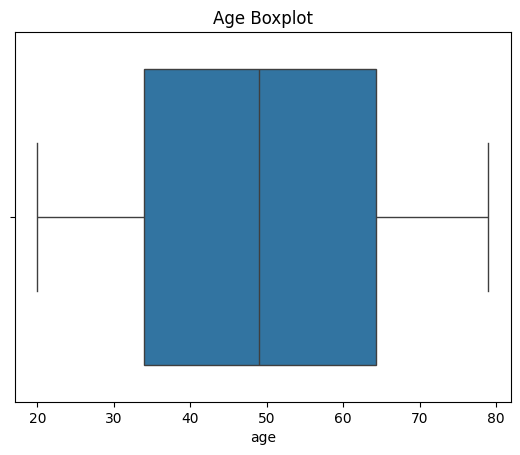

In [20]:
sns.boxplot(x="age", data=df_cholesterol_eda)
plt.title("Age Boxplot")

Text(0.5, 1.0, 'Weight Boxplot')

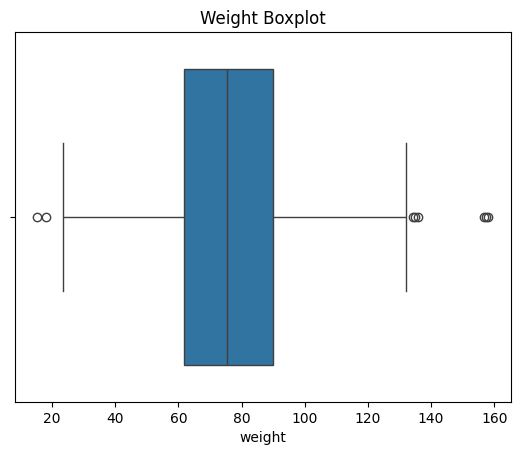

In [21]:
sns.boxplot(x="weight", data=df_cholesterol_eda)
plt.title("Weight Boxplot")

In [22]:
# Remove outliers from "weight" column. We will remove the rows where weight is less than 40kg, because
# it's unlikely an adult would weigh less than 40kg.
df_cholesterol_eda = df_cholesterol_eda[df_cholesterol_eda.weight >= 40.0]
print(f"Number of rows after removing outliers: {df_cholesterol_eda.shape[0]}")

Number of rows after removing outliers: 963


Text(0.5, 1.0, 'Weight Boxplot (Outliers Removed)')

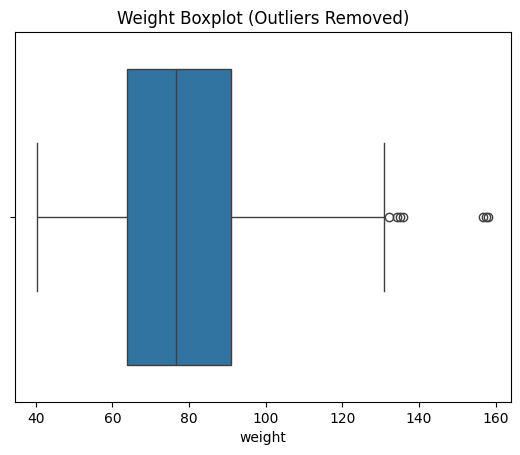

In [23]:
sns.boxplot(x="weight", data=df_cholesterol_eda)
plt.title("Weight Boxplot (Outliers Removed)")

We can see we still have outliers in the column, but we will not remove them because it's possible adults weighting over 130kg.


Text(0.5, 1.0, 'Height Boxplot')

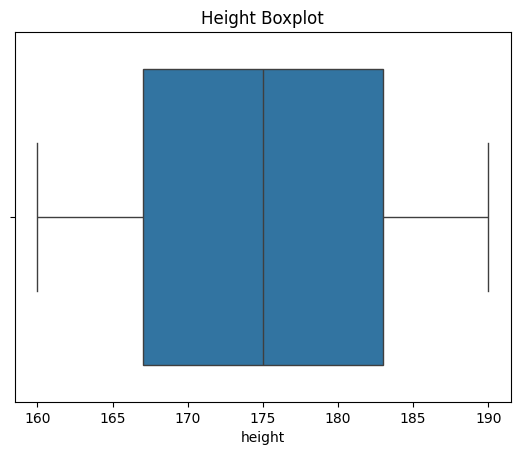

In [24]:
sns.boxplot(x="height", data=df_cholesterol_eda)
plt.title("Height Boxplot")

Text(0.5, 1.0, 'Cholesterol Boxplot')

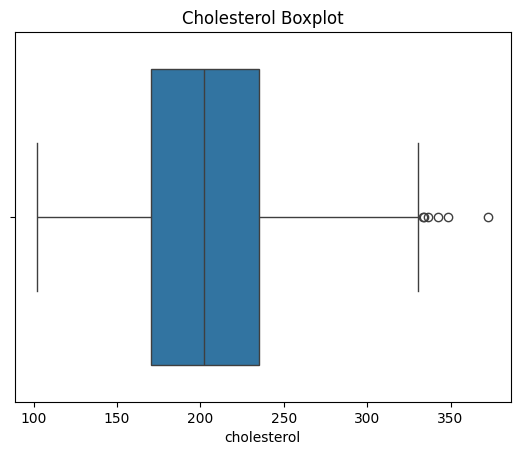

In [25]:
sns.boxplot(x="cholesterol", data=df_cholesterol_eda)
plt.title("Cholesterol Boxplot")

### Analyzing the target variable compared to the features


Text(0.5, 1.0, 'Cholesterol by Blood Type Boxplot')

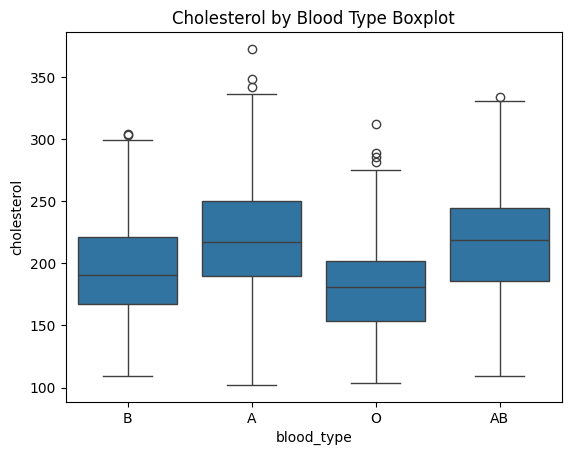

In [26]:
sns.boxplot(x="blood_type", y="cholesterol", data=df_cholesterol_eda)
plt.title("Cholesterol by Blood Type Boxplot")

Text(0.5, 1.0, 'Cholesterol by Smoker Boxplot')

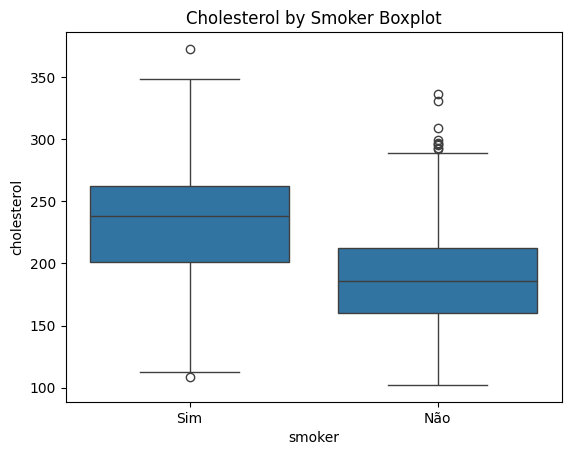

In [27]:
sns.boxplot(x="smoker", y="cholesterol", data=df_cholesterol_eda)
plt.title("Cholesterol by Smoker Boxplot")

Text(0.5, 1.0, 'Cholesterol by Activity Level Boxplot')

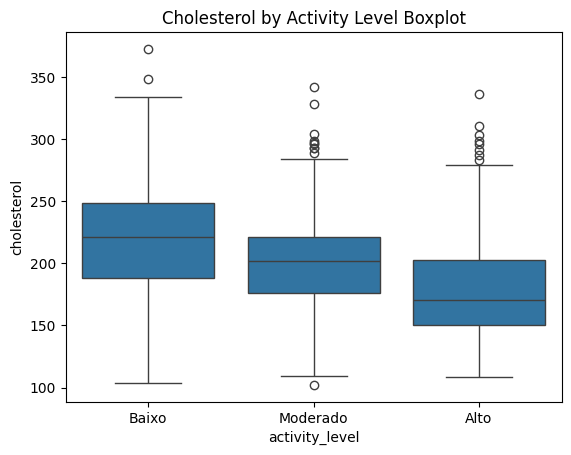

In [28]:
sns.boxplot(x="activity_level", y="cholesterol", data=df_cholesterol_eda)
plt.title("Cholesterol by Activity Level Boxplot")

Text(0.5, 1.0, 'Cholesterol by Age Scatterplot')

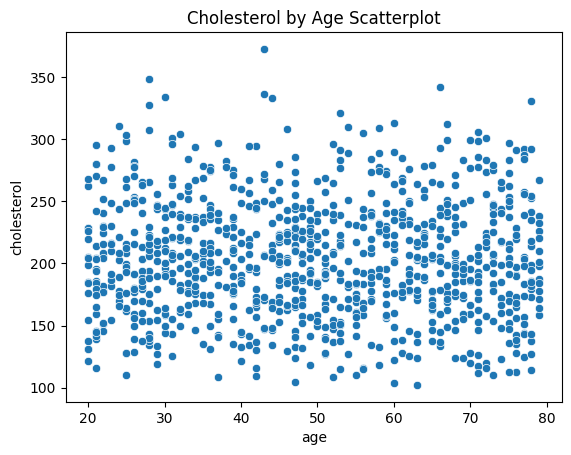

In [29]:
sns.scatterplot(x="age", y="cholesterol", data=df_cholesterol_eda)
plt.title("Cholesterol by Age Scatterplot")

Text(0.5, 1.0, 'Cholesterol by Weight Scatterplot')

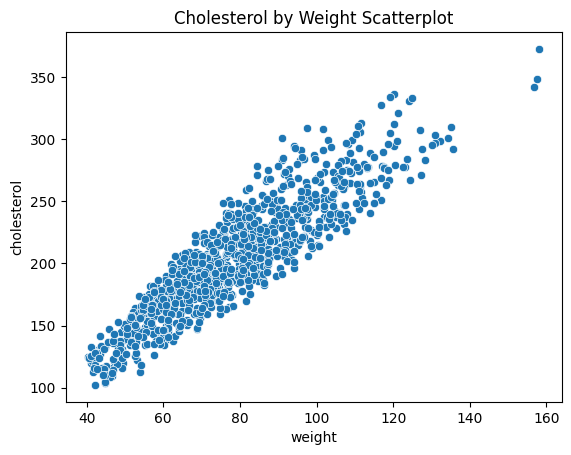

In [30]:
sns.scatterplot(x="weight", y="cholesterol", data=df_cholesterol_eda)
plt.title("Cholesterol by Weight Scatterplot")

Text(0.5, 1.0, 'Cholesterol by Height Scatterplot')

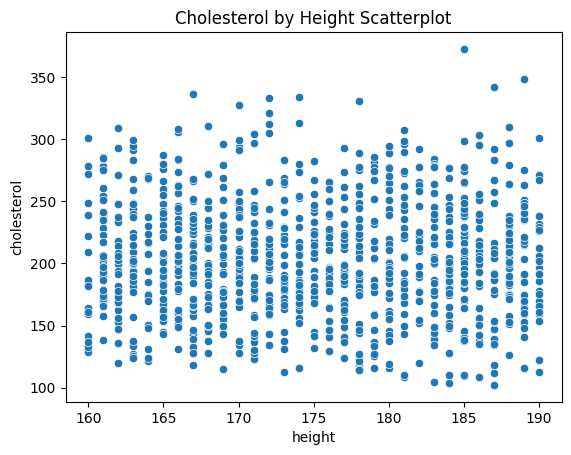

In [31]:
sns.scatterplot(x="height", y="cholesterol", data=df_cholesterol_eda)
plt.title("Cholesterol by Height Scatterplot")

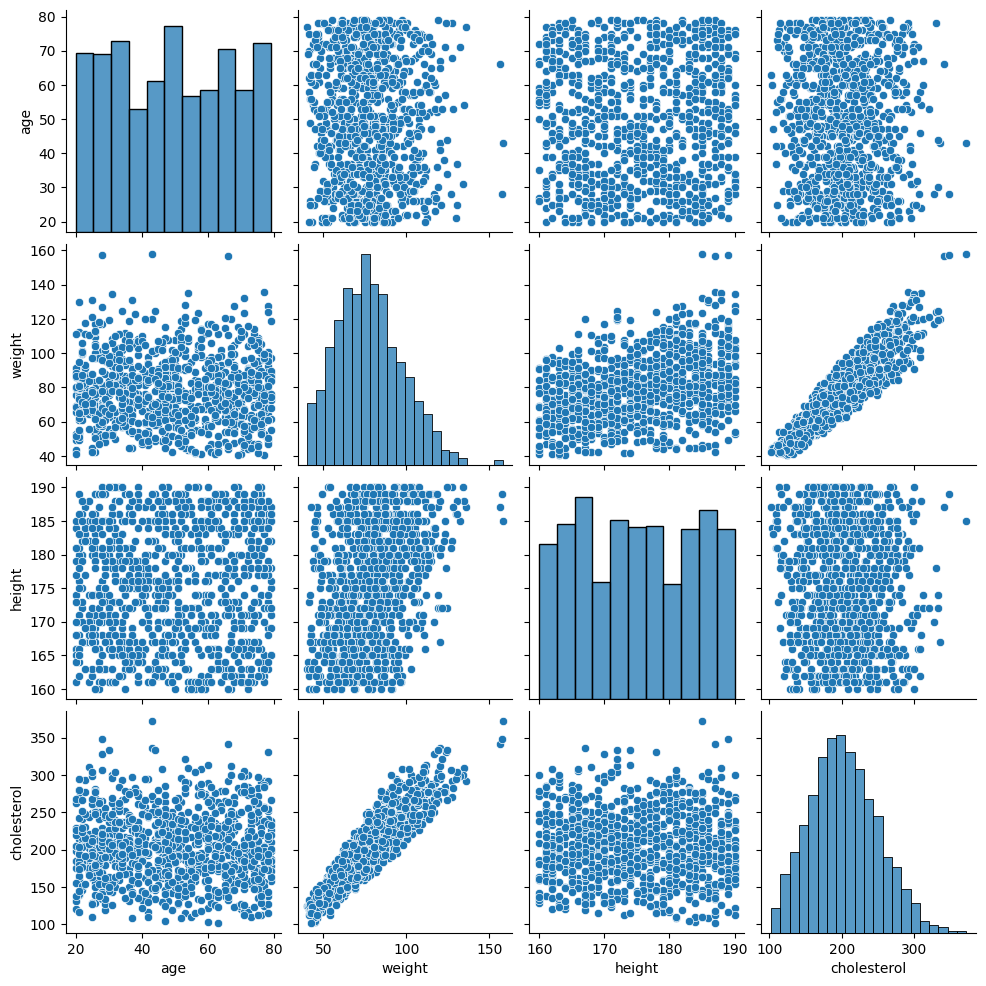

In [32]:
sns.pairplot(df_cholesterol_eda)

### Correlation matrix


In [33]:
# Convert nominal columns to numerical using one-hot encoding
df_cholesterol_eda = df_cholesterol_eda = pd.get_dummies(
    df_cholesterol_eda,
    columns=["blood_type", "smoker"],
    dtype="int64",
)

In [34]:
# Convert ordinal column to numerical using factorization
df_cholesterol_eda["activity_level"] = pd.factorize(
    df_cholesterol_eda["activity_level"]
)[0]

In [35]:
df_cholesterol_eda.head(10)

,activity_level,age,weight,height,cholesterol,blood_type_A,blood_type_AB,blood_type_B,blood_type_O,smoker_Não,smoker_Sim
0,0,33,85.1,186,199.63,0,0,1,0,0,1
1,1,68,105.0,184,236.98,1,0,0,0,1,0
2,2,25,64.8,180,161.79,0,0,0,1,1,0
3,2,43,120.2,167,336.24,1,0,0,0,1,0
4,0,79,88.5,175,226.23,0,1,0,0,1,0
5,0,68,66.8,170,185.31,0,0,1,0,1,0
6,0,60,117.3,181,289.33,1,0,0,0,0,1
7,1,35,86.9,174,216.48,0,0,0,1,0,1
8,0,62,81.3,166,235.30,0,0,0,1,1,0
10,0,57,123.6,183,283.87,1,0,0,0,0,1


<Axes: >

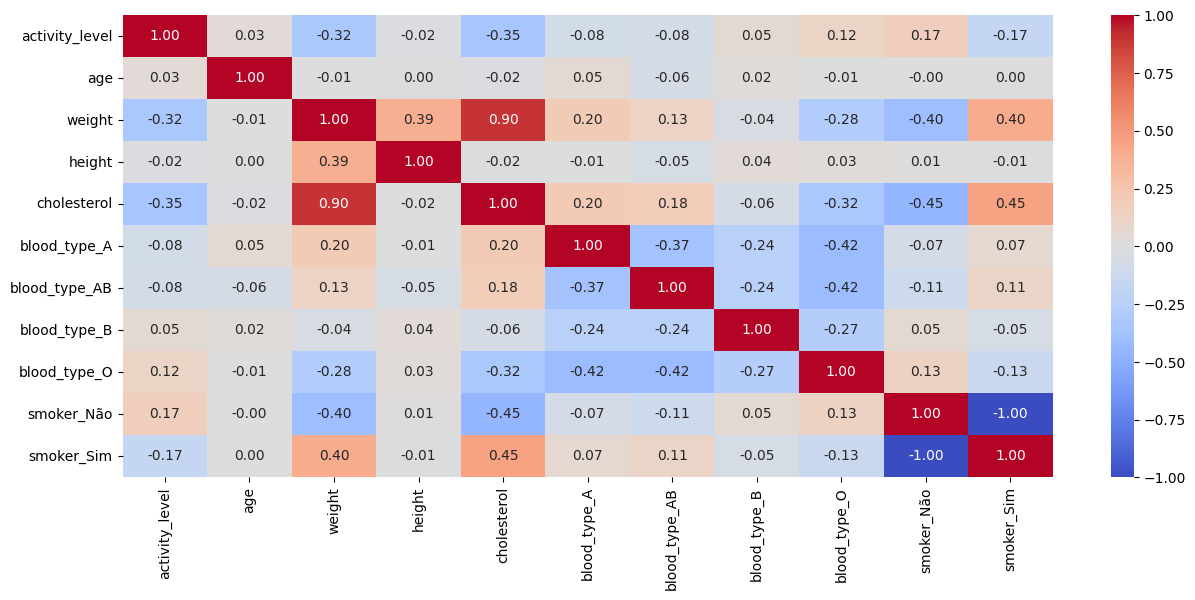

In [36]:
plt.figure(figsize=(15, 6))
sns.heatmap(
    df_cholesterol_eda.corr(),
    annot=True,
    fmt=".2f",
    vmin=-1,
    vmax=1,
    cmap="coolwarm",
)

<Axes: >

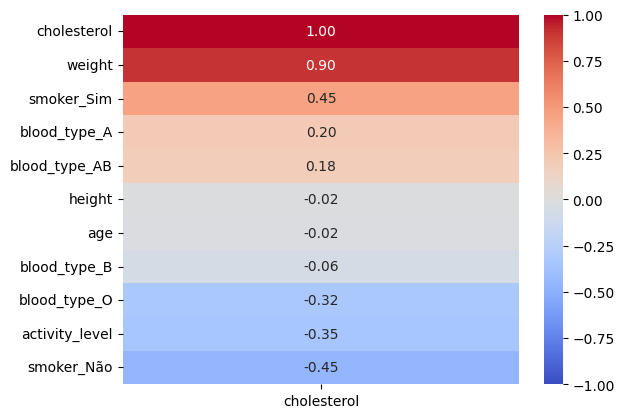

In [37]:
sns.heatmap(
    df_cholesterol_eda.corr()["cholesterol"].sort_values(ascending=False).to_frame(),
    annot=True,
    fmt=".2f",
    vmin=-1,
    vmax=1,
    cmap="coolwarm",
)

### Bucketing

Bucking is a technique used to group continuous values into smaller number of buckets. This can help improve the performance of the model by reducing the number of unique values in the dataset.


In [38]:
# Bucketing "age" column
bins_age = [20, 30, 40, 50, 60, 70, 80]
labels_age = ["20-29", "30-39", "40-49", "50-59", "60-69", "70-79"]

df_cholesterol_bucketing["age_scale"] = pd.cut(
    x=df_cholesterol_bucketing["age"],
    bins=bins_age,
    labels=labels_age,
    include_lowest=True,
)

In [39]:
df_cholesterol_bucketing.head(10)

,blood_type,smoker,activity_level,age,weight,height,cholesterol,age_scale
0,B,Sim,Baixo,33.0,85.1,186.0,199.63,30-39
1,A,Não,Moderado,68.0,105.0,184.0,236.98,60-69
2,O,Não,Alto,25.0,64.8,180.0,161.79,20-29
3,A,Não,Alto,43.0,120.2,167.0,336.24,40-49
4,AB,Não,Baixo,79.0,88.5,175.0,226.23,70-79
5,B,Não,Baixo,68.0,66.8,170.0,185.31,60-69
6,A,Sim,Baixo,60.0,117.3,181.0,289.33,50-59
7,O,Sim,Moderado,35.0,86.9,174.0,216.48,30-39
8,O,Não,Baixo,62.0,81.3,166.0,235.30,60-69
9,B,Sim,Alto,44.0,32.7,165.0,97.79,40-49


Text(0.5, 1.0, 'Cholesterol by Age Group Boxplot')

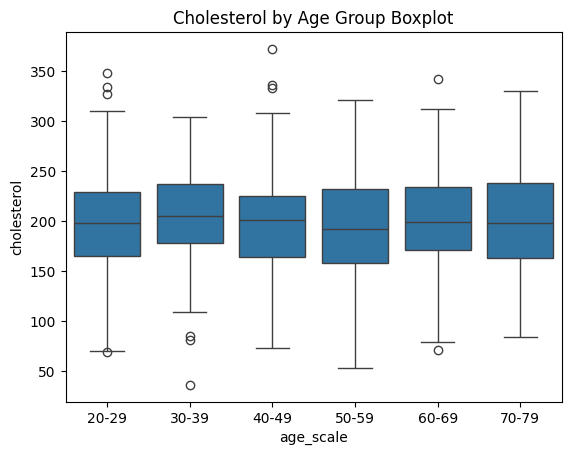

In [40]:
sns.boxplot(x="age_scale", y="cholesterol", data=df_cholesterol_bucketing)
plt.title("Cholesterol by Age Group Boxplot")

In [41]:
# Bucketing "weight" column
bins_weight = [40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160]
labels_weight = [
    "40-49",
    "50-59",
    "60-69",
    "70-79",
    "80-89",
    "90-99",
    "100-109",
    "110-119",
    "120-129",
    "130-139",
    "140-149",
    "150-159",
]

df_cholesterol_bucketing["weight_scale"] = pd.cut(
    x=df_cholesterol_bucketing["weight"],
    bins=bins_weight,
    labels=labels_weight,
    include_lowest=True,
)

In [42]:
df_cholesterol_bucketing.head(10)

,blood_type,smoker,activity_level,age,weight,height,cholesterol,age_scale,weight_scale
0,B,Sim,Baixo,33.0,85.1,186.0,199.63,30-39,80-89
1,A,Não,Moderado,68.0,105.0,184.0,236.98,60-69,100-109
2,O,Não,Alto,25.0,64.8,180.0,161.79,20-29,60-69
3,A,Não,Alto,43.0,120.2,167.0,336.24,40-49,120-129
4,AB,Não,Baixo,79.0,88.5,175.0,226.23,70-79,80-89
5,B,Não,Baixo,68.0,66.8,170.0,185.31,60-69,60-69
6,A,Sim,Baixo,60.0,117.3,181.0,289.33,50-59,110-119
7,O,Sim,Moderado,35.0,86.9,174.0,216.48,30-39,80-89
8,O,Não,Baixo,62.0,81.3,166.0,235.30,60-69,80-89
9,B,Sim,Alto,44.0,32.7,165.0,97.79,40-49,NaN


Text(0.5, 1.0, 'Cholesterol by Weight Group Boxplot')

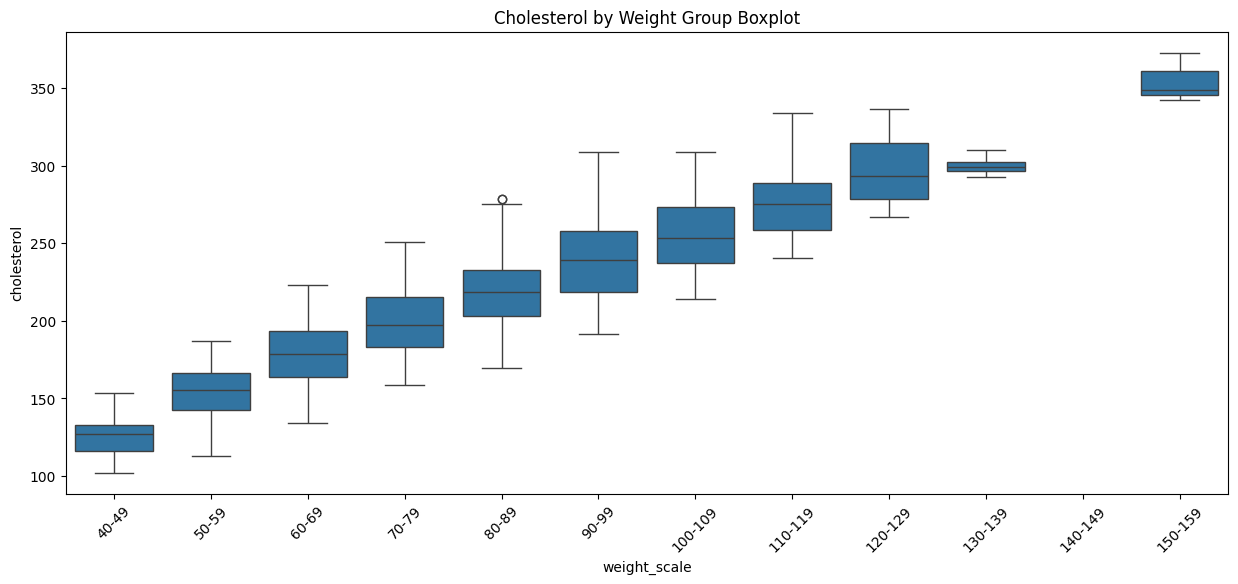

In [43]:
plt.figure(figsize=(15, 6))
sns.boxplot(x="weight_scale", y="cholesterol", data=df_cholesterol_bucketing)
plt.xticks(rotation=45)
plt.title("Cholesterol by Weight Group Boxplot")

## Training the model


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

In [45]:
# Drop invalid values from "weight" column
df_cholesterol.drop(
    df_cholesterol[df_cholesterol["weight"] < 40].index,
    inplace=True,
    axis=0,
)

In [46]:
df_cholesterol.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   blood_type      960 non-null    object 
 1   smoker          960 non-null    object 
 2   activity_level  959 non-null    object 
 3   age             960 non-null    float64
 4   weight          960 non-null    float64
 5   height          960 non-null    float64
 6   cholesterol     963 non-null    float64
dtypes: float64(4), object(3)
memory usage: 60.2+ KB


In [47]:
X = df_cholesterol.drop(columns=["cholesterol"], axis=1)
y = df_cholesterol["cholesterol"]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=51
)

In [49]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((674, 6), (289, 6), (674,), (289,))

In [50]:
# Pipeline
# 1. Impute "mode" for categorical columns and "median" for numerical columns
# 2. Standardize numerical columns
# 3. One-hot encode nominal columns
# 4. Factorize ordinal columns
numeric_columns = ["age", "weight", "height"]
nominal_columns = ["blood_type", "smoker"]
ordinal_columns = ["activity_level"]

# Transformers
nominal_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
ordinal_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        (
            "ordinal",
            OrdinalEncoder(
                categories=[["Baixo", "Moderado", "Alto"]],
                handle_unknown="error",
            ),
        ),
    ]
)
numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
    ]
)

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_columns),
        ("nom", nominal_transformer, nominal_columns),
        ("ord", ordinal_transformer, ordinal_columns),
    ]
)

In [51]:
# Create main pipeline - Preprocessor + Model
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", LinearRegression()),
    ]
)

In [52]:
# Fit the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'weight', 'height']),
                                                 ('nom',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['blood_type', 'smoker']),
                                                 ('ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['Baixo',
                                                                                               'Moderado',
                                                                                               'Alto']]))]),
                                                  ['activity_level'])])),
                ('regressor', LinearRegression())])

## Metrics


In [53]:
# Predict the test set
y_pred = model.predict(X_test)

In [54]:
# R2 Score
r2_score(y_test, y_pred)

0.9594250724093464

In [55]:
# MAE (Mean Absolute Error)
mean_absolute_error(y_test, y_pred)

np.float64(7.313838031022507)

In [56]:
# RMSE (Root Mean Squared Error)
root_mean_squared_error(y_test, y_pred)

np.float64(9.097649246487036)

## Residuals analysis


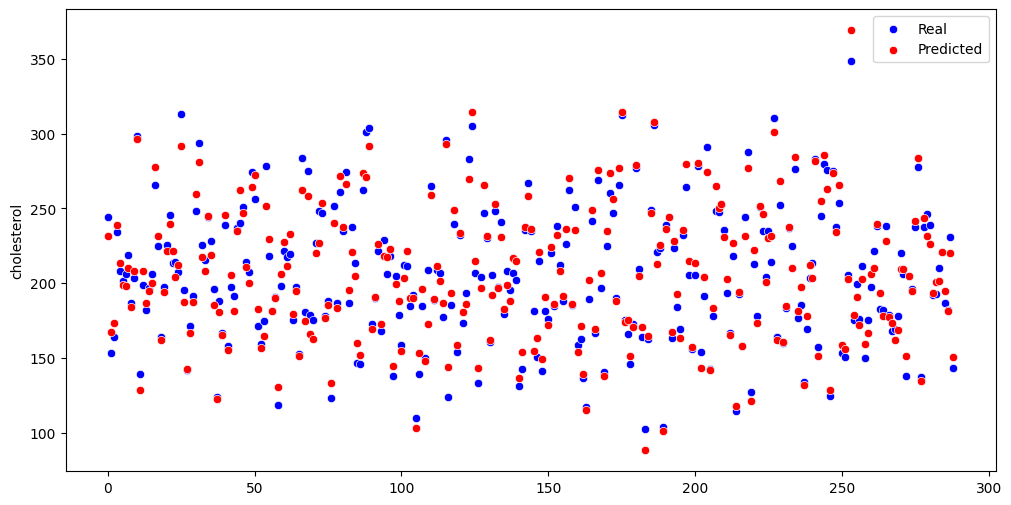

In [57]:
# Display the difference between the real and predicted values of the test set using a scatter plot
x_axis = range(len(y_test))
plt.figure(figsize=(12, 6))
sns.scatterplot(x=x_axis, y=y_test, color="blue", label="Real")
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color="red", label="Predicted")
plt.legend()
plt.show()

In [58]:
# Calculate the residuals
residuals = y_test - y_pred

In [59]:
from scipy.stats import zscore

# Calculate the z-scores of the residuals
residuals_z = zscore(residuals)

Text(0.5, 1.0, 'Residuals vs Predictions')

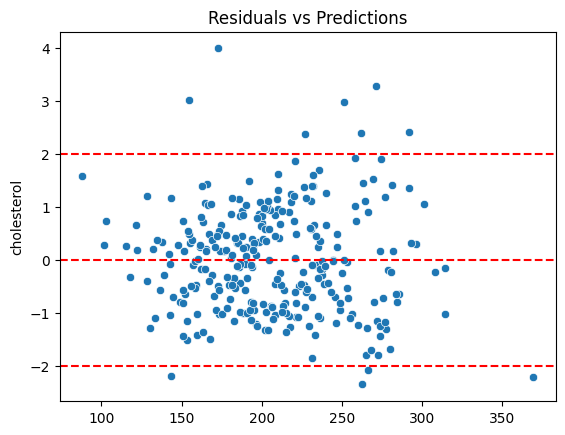

In [60]:
# Plot residuals vs predictions to check for homoscedasticity
sns.scatterplot(x=y_pred, y=residuals_z)
plt.axhline(y=0, color="r", linestyle="--")
plt.axhline(y=-2, color="r", linestyle="--")
plt.axhline(y=2, color="r", linestyle="--")
plt.title("Residuals vs Predictions")

Text(0.5, 1.0, 'Residuals Distribution')

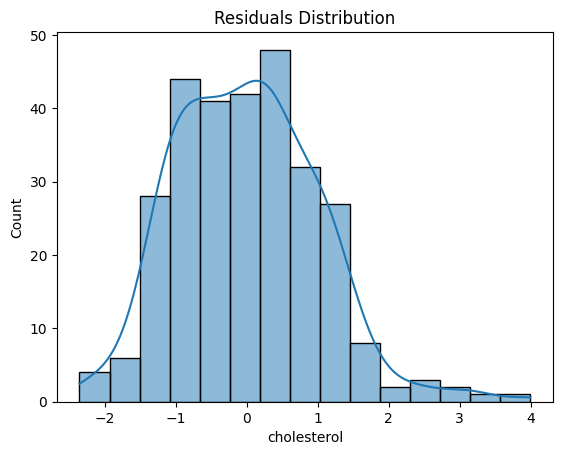

In [61]:
sns.histplot(residuals_z, kde=True)
plt.title("Residuals Distribution")

Text(0.5, 1.0, 'Q-Q Plot')

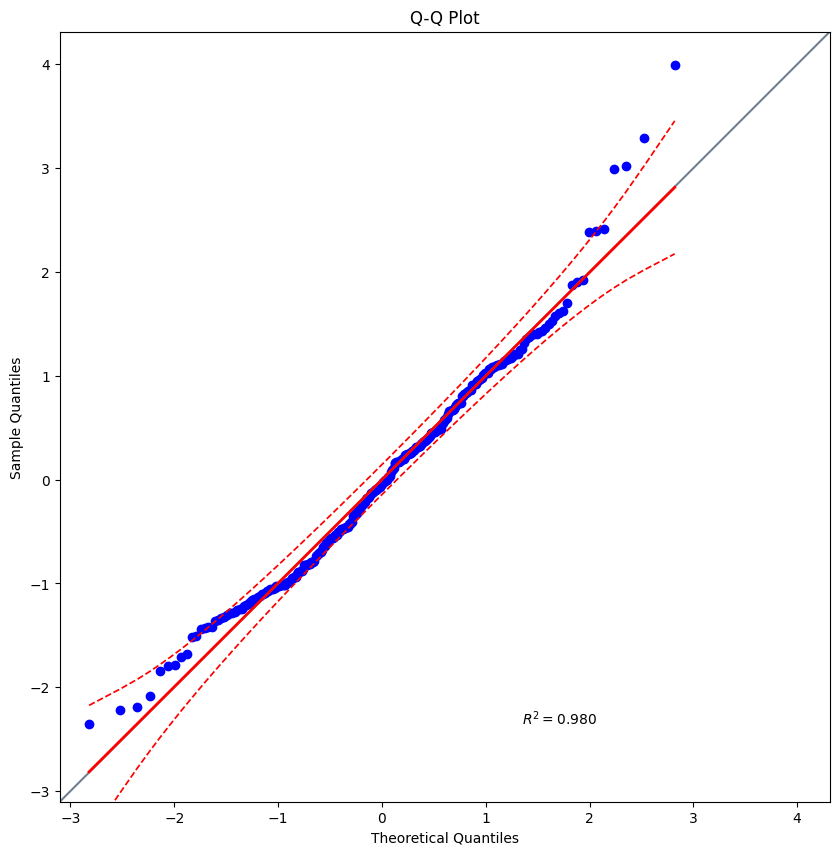

In [62]:
import pingouin as pg

plt.figure(figsize=(10, 10))
pg.qqplot(residuals_z, dist="norm", confidence=0.95)
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.title("Q-Q Plot")

In [63]:
from scipy.stats import shapiro, kstest, anderson
from statsmodels.stats.diagnostic import lilliefors, het_goldfeldquandt

In [64]:
# Shapiro-Wilk test. The Shapiro-Wilk test is a test of normality in frequentist statistics. It tests
# the null hypothesis that the data was drawn from a normal distribution. If the p-value is less than
# 0.05, we reject the null hypothesis and conclude that the data is not normally distributed.
_, shapiro_p_value = shapiro(residuals_z)
print(f"Shapiro-Wilk p-value: {shapiro_p_value}")

Shapiro-Wilk p-value: 0.0006268860444492424


In [65]:
# Kolmogorov-Smirnov test. The Kolmogorov-Smirnov test is a test of normality in frequentist statistics.
# It tests the null hypothesis that the data was drawn from a normal distribution. If the p-value is less
# than 0.05, we reject the null hypothesis and conclude that the data is not normally distributed.
_, ks_p_value = kstest(residuals, "norm")
print(f"Kolmogorov-Smirnov p-value: {ks_p_value}")

Kolmogorov-Smirnov p-value: 8.925833190901912e-48


In [66]:
# Liliefors test
_, lilliefors_p_value = lilliefors(residuals, dist="norm", pvalmethod="table")
print(f"Lilliefors p-value: {lilliefors_p_value}")

Lilliefors p-value: 0.12533323720738668


In [67]:
# Anderson-Darling test
anderson_stats, anderson_critical_values, anderson_significance = anderson(
    residuals, dist="norm"
)
print(f"Anderson-Darling statistics: {anderson_stats}")
print(f"Anderson-Darling critical value: {anderson_critical_values[2]}")

Anderson-Darling statistics: 0.9169275158490109
Anderson-Darling critical value: 0.776


In [68]:
pipe = Pipeline(steps=[("preprocessor", preprocessor)])
X_test_transformed = pipe.fit_transform(X_test)

# Goldfeld-Quandt test (heteroscedasticity test)
gold_stats, gold_p_value, _ = het_goldfeldquandt(y_test, X_test_transformed)
print(f"Goldfeld-Quandt statistics: {gold_stats}")
print(f"Goldfeld-Quandt p-value: {gold_p_value}")

Goldfeld-Quandt statistics: 0.6758349511821803
Goldfeld-Quandt p-value: 0.9883422455429186


## Predictions


In [70]:
individual_prediction = {
    "blood_type": "O",
    "smoker": "Não",
    "activity_level": "Alto",
    "age": 26,
    "weight": 80,
    "height": 183,
}

individual_prediction_df = pd.DataFrame(individual_prediction, index=[0])
individual_prediction_df

,blood_type,smoker,activity_level,age,weight,height
0,O,Não,Alto,26,80,183


In [71]:
model.predict(individual_prediction_df)

array([184.07572825])

## Saving the model


In [72]:
import joblib
import os

os.makedirs("models", exist_ok=True)
joblib.dump(model, "models/cholesterol_model.pkl")

['models/cholesterol_model.pkl']